In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# 遍历文件夹中的所有图片

In [2]:
ori_path = './原图/'
imgs = os.listdir(ori_path) 
print('共{}张图片'.format(len(imgs)))

共8张图片


# 读取图像并进行旋转变换

(<Axes: >, <matplotlib.image.AxesImage at 0x130711f90>, ([], []), ([], []))

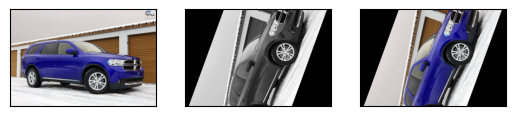

In [23]:
# 读取图片
image = cv2.imread(ori_path+imgs[2])
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 旋转图片
rows, cols = gray_image.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 70, 1)
rotated_image = cv2.warpAffine(gray_image, M, (cols, rows))
# rotated_image_rgb = cv2.cvtColor(rotated_image,cv2.COLOR_GRAY2RGB)
rotated_image_rgb = cv2.warpAffine(image, M, (cols, rows))

#显示图片
plt.subplot(131),plt.imshow(image),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(rotated_image,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(rotated_image_rgb),plt.xticks([]),plt.yticks([])

# 角点检测(harris算子)

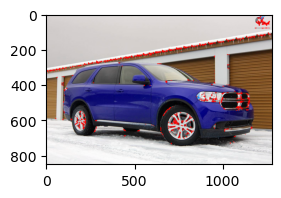

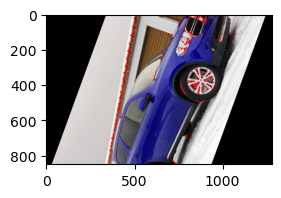

(<Axes: >, <matplotlib.image.AxesImage at 0x12272a5d0>, None)

In [24]:
# Harris角点检测
gray_image_copy = gray_image.copy()
gray_rotated_copy = rotated_image.copy()

# 设置Harris角点检测参数
k = 0.04
blockSize = 3
thresh = 21
corners_img = cv2.cornerHarris(gray_image_copy,blockSize, thresh,k)
corners_rotated_img = cv2.cornerHarris(gray_rotated_copy,blockSize, thresh,k)

# 对角点进行膨胀处理，以便更好地显示在图像上
corners_img = cv2.dilate(corners_img, None)
corners_rotated_img = cv2.dilate(corners_rotated_img, None)

# 设置角点标记的颜色和大小
color = [255, 0, 0]
thickness = 2
lineType = 8

# 在原图和变换后的图片上绘制角点标记
image[corners_img>0.01*corners_img.max()]=[255,0,0]
rotated_image_rgb[corners_rotated_img>0.01*corners_rotated_img.max()]=[255,0,0]
# cv2.circle(image, (int(cols / 2), int(rows / 2)), 5, color, thickness)
# cv2.circle(rotated_image, (int(cols / 2), int(rows / 2)), 5, color, thickness)
# cv2.putText(image, 'Original Image', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, thickness)
# cv2.putText(rotated_image, 'Rotated Image', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, thickness)
plt.subplot(121),plt.imshow(image),plt.show()
plt.subplot(122),plt.imshow(rotated_image_rgb),plt.show()

# cv2.imshow('Original Image', image)
# cv2.imshow('Rotated Image', rotated_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()